In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# The data has already been stored into training and tests sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

5

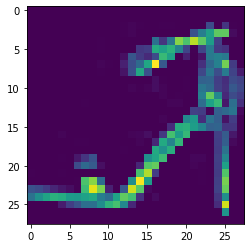

In [4]:
# plot a single example 
import matplotlib.pyplot as plt
plt.imshow(train_data[8])

# check sample lable
train_labels[8]

In [5]:
# Corresponded names for train_lables
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
se_lables = set(train_labels)
len(class_names), se_lables              

(10, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

In [12]:
# Normalized data
data_max =  train_data.max()
train_data = train_data / data_max
test_data = test_data / data_max

# Check the min and max values of the training data, it must to between 0 and 1
train_data.min(), train_data.max()

(0.0, 1.0)

In [33]:
tf.random.set_seed(8)
#
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), #The input shape 28x28 tensors (the height and width of images). By Flatten layer the input will squash  into a tensor (vector) of shape (784).
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,  activation=tf.keras.activations.softmax), #The output shape will have to be 10 because  model to predict for 10 different classes. The activation parameter is "softmax" instead of 'sigmoid'.  The "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
])
#
current_lr = 0.001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), #Since labels are in integer form, Need to use tf.keras.losses.SparseCategoricalCrossentropy(), else if  labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), Need to use tf.keras.losses.CategoricalCrossentropy().
              optimizer= tf.keras.optimizers.Adam(lr=current_lr), 
              metrics=["accuracy"])

# Create the learning rate callback
flr = lambda x: 1e-3 * 10**(x/20)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(flr)

#
epochs_count = 30
history = model.fit(train_data, train_labels, epochs=epochs_count,
              validation_data=(test_data, test_labels),
              callbacks=[lr_scheduler])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 108us/sample - loss: 1.1094 - accuracy: 0.6103 - val_loss: 0.8151 - val_accuracy: 0.7256
Epoch 2/30
60000/60000 [==============================] - 6s 94us/sample - loss: 0.7183 - accuracy: 0.7542 - val_loss: 0.6882 - val_accuracy: 0.7752
Epoch 3/30
60000/60000 [==============================] - 6s 98us/sample - loss: 0.6317 - accuracy: 0.7838 - val_loss: 0.6598 - val_accuracy: 0.7776
Epoch 4/30
60000/60000 [==============================] - 6s 101us/sample - loss: 0.6051 - accuracy: 0.7918 - val_loss: 0.6193 - val_accuracy: 0.7890
Epoch 5/30
60000/60000 [==============================] - 6s 101us/sample - loss: 0.5917 - accuracy: 0.7939 - val_loss: 0.6368 - val_accuracy: 0.7804
Epoch 6/30
60000/60000 [==============================] - 6s 103us/sample - loss: 0.5846 - accuracy: 0.7962 - val_loss: 0.6123 - val_accuracy: 0.7885
Epoch 7/30
60000/60000 [============================

In [34]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_20 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


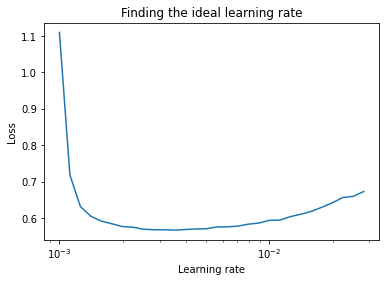

In [35]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = flr(np.arange(epochs_count))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

# By the graph, the best learning rate is lr=0.001 need to set up into optimizer= tf.keras.optimizers.Adam( lr =),
current_lr = 0.001

In [36]:
import itertools
from sklearn.metrics import confusion_matrix

#Evaluate model performance using other classification metrics (such as a confusion matrix or classification report).

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [40]:
# Make predictions 
y_probs = model.predict(test_data) # "probs" is short for probabilities

# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# Check out the common confusion matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)


array([[916,   4,   6,  28,   3,   0,  30,   0,  13,   0],
       [ 37, 927,   2,  27,   2,   0,   4,   0,   1,   0],
       [101,   1, 370,  12, 296,   0, 215,   0,   5,   0],
       [110,  42,  18, 734,  21,   1,  70,   0,   4,   0],
       [ 12,   0,  41,  63, 663,   2, 198,   0,  21,   0],
       [  2,   1,   0,   1,   0, 888,   2,  23,  56,  27],
       [339,   1,  44,  26, 116,   1, 441,   0,  32,   0],
       [  0,   0,   0,   0,   0, 140,   0, 812,   6,  42],
       [ 17,   0,   0,   4,   1,   5,  30,   5, 938,   0],
       [  0,   1,   0,   0,   0, 155,   1,  33,   2, 808]])

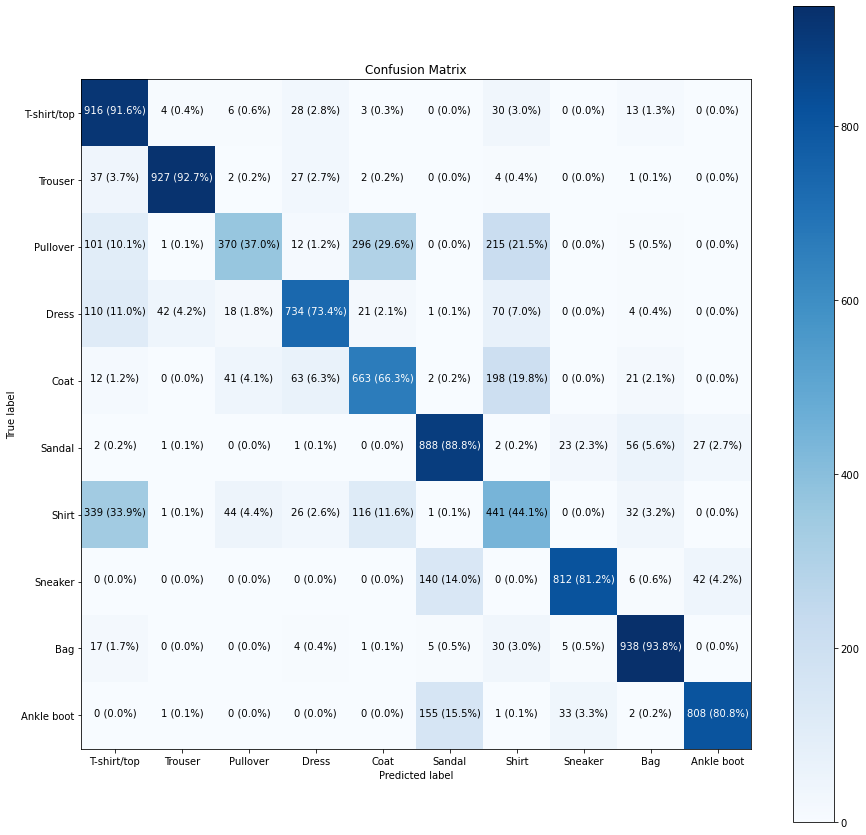

In [46]:
# Make a custom confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [50]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

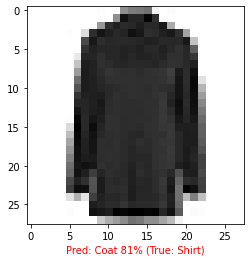

In [66]:
# Check out a random image as well as its prediction
plot_random_image(model=model, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)